In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

In [ ]:
data=pd.read_csv("C:\Users\ACH\OneDrive - OFPPT\Documents\AI\Analyse_des_donnees\Data2\data\earthquake_data_tsunami.csv")

In [61]:
data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


# Description du Dataset 

Ce jeu de données regroupe des informations sismiques liées aux tremblements de terre entre **2001 et 2022**.  
L’objectif est de **prédire la probabilité qu’un séisme provoque un tsunami** à partir de ses caractéristiques physiques et géographiques.  
Chaque ligne représente un événement sismique observé, et la variable cible `tsunami` indique s’il a entraîné (1) ou non (0) un tsunami.

link : https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset


---

## Feature Description

| **Variable** | **Type** | **Description** | **Plage / Valeurs** |
|---------------|-----------|------------------|----------------------|
| **magnitude** | Float | Magnitude du séisme sur l’échelle de Richter | 6.5 – 9.1 |
| **cdi** | Integer | Intensité ressentie par la population (Community Decimal Intensity) | 0 – 9 |
| **mmi** | Integer | Intensité instrumentale de Mercalli modifiée | 1 – 9 |
| **sig** | Integer | Score global de signification de l’événement | 650 – 2910 |
| **nst** | Integer | Nombre de stations sismiques ayant détecté l’événement | 0 – 934 |
| **dmin** | Float | Distance à la station sismique la plus proche (en degrés) | 0.0 – 17.7 |
| **gap** | Float | Écart azimutal entre les stations (en degrés) | 0.0 – 239.0 |
| **depth** | Float | Profondeur du foyer du séisme (en kilomètres) | 2.7 – 670.8 |
| **latitude** | Float | Latitude de l’épicentre (système WGS84) | -61.85° – 71.63° |
| **longitude** | Float | Longitude de l’épicentre (système WGS84) | -179.97° – 179.66° |
| **Year** | Integer | Année de survenue de l’événement | 2001 – 2022 |
| **Month** | Integer | Mois de survenue de l’événement | 1 – 12 |
| **tsunami** | Binaire | Potentiel de tsunami (**variable cible**) | 0, 1 |

In [62]:
data.shape

(782, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [64]:
data.duplicated().sum()

np.int64(0)

In [65]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


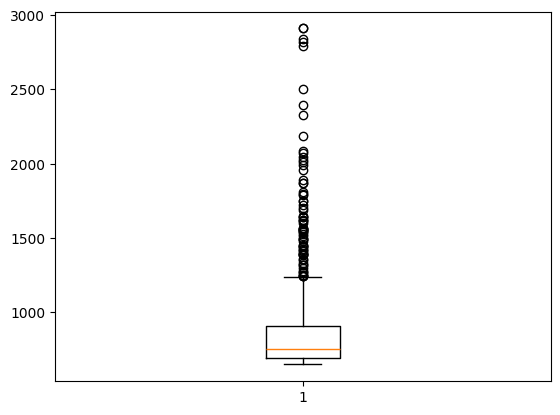

In [66]:
plt.boxplot(data['sig'])
plt.show()

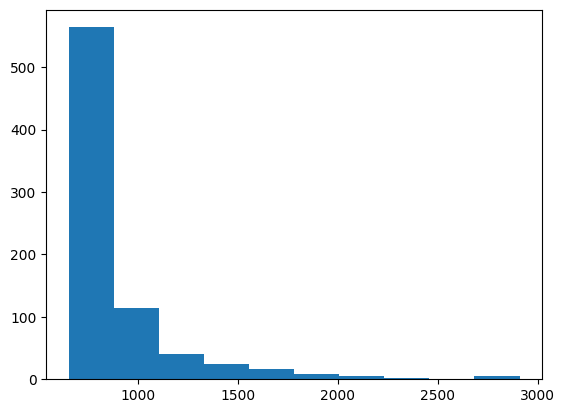

In [67]:
plt.hist(data['sig'])
plt.show()

In [68]:
Q1 = data['sig'].quantile(0.25)
Q3 = data['sig'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(362.875), np.float64(1237.875))

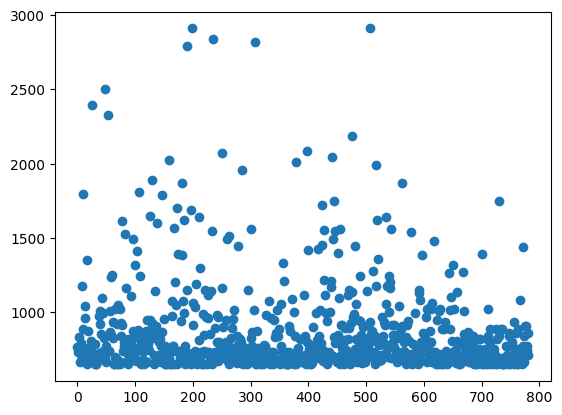

In [69]:
plt.scatter(data['sig'].index, data['sig'].values)
plt.show()

In [70]:
data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


## La corelation :

In [71]:
numeric_cl = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_cl.corr().reset_index()

display(correlation_matrix)

,index,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
1,cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
2,mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
3,sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
4,nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
5,dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
6,gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
7,depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
8,latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
9,longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


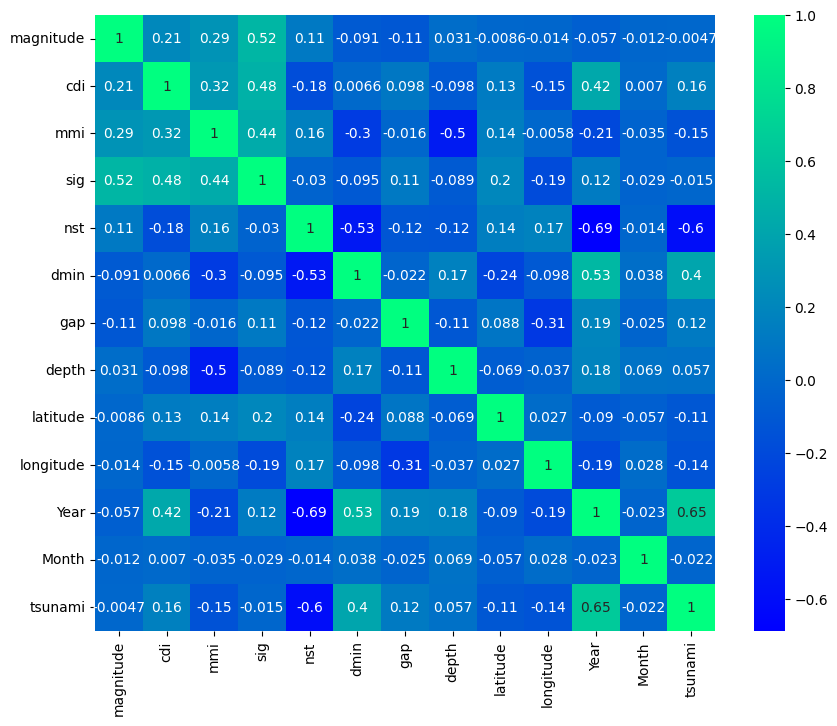

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cl.corr(), annot=True, cmap="winter")
plt.show()

In [73]:
# data_1 = data[data['tsunami']==1]
# data_0 = data[data['tsunami']==0].sample(len(data_1), random_state=42)

# data_balanced = pd.concat([data_1,data_0], axis=0).sample(frac=1, random_state=42)
# data_balanced

In [ ]:
X = data.drop(columns=['tsunami','magnitude','sig', 'Month','depth'])
y = data['tsunami']

In [75]:
X.shape

(782, 8)

In [76]:
print(y.value_counts())

tsunami
0    478
1    304
Name: count, dtype: int64


In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
X_train.shape, y_train.shape

((625, 8), (625,))

In [79]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.shape, y_train.shape

((625, 8), (625,))

# `Machine learning :`

In [80]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

## l'Entraîrement Du Modèle


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Prédiction sur les données de test


In [82]:
y_pred_log = model.predict(X_test)

# **Évaluation du modèle** :


## Accuracy du modèle


In [83]:
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## F1-score du modèle


In [84]:
f1 = f1_score(y_test, y_pred_log)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.80


### Rapport de classification


In [85]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        91
           1       0.76      0.83      0.80        66

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



## Matrice de confusion


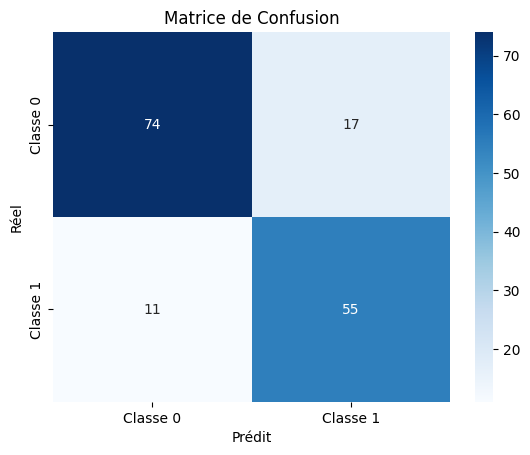

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

## Calcul de la courbe ROC


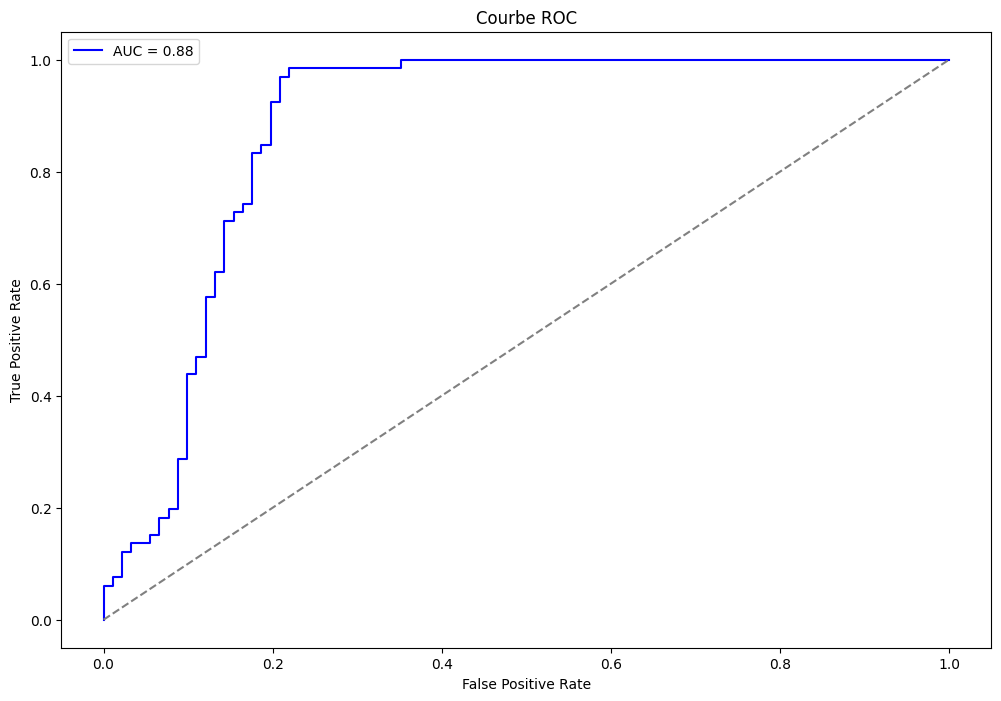

In [87]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


# **Modèle KNN :**


## L'Entraîrement Du Modèle


In [88]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Prédictions sur les données de test


In [89]:
y_pred_knn = knn.predict(X_test)


## **Évaluation du modèle** :


### l'accuracy


In [90]:
accuracy_knn = accuracy_score(y_test, y_pred_knn )
print(f"Précision du modèle KNN: {accuracy_knn:.2f}")

Précision du modèle KNN: 0.85


## F1-score du modèle


In [91]:
f1 = f1_score(y_test, y_pred_knn)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.83


### Rapport de classification


In [92]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        91
           1       0.79      0.86      0.83        66

    accuracy                           0.85       157
   macro avg       0.84      0.85      0.84       157
weighted avg       0.85      0.85      0.85       157



### Matrice de confusion :


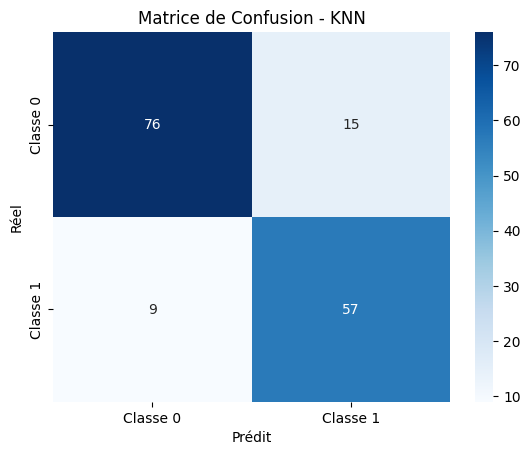

In [93]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - KNN')
plt.show()

### la courbe ROC


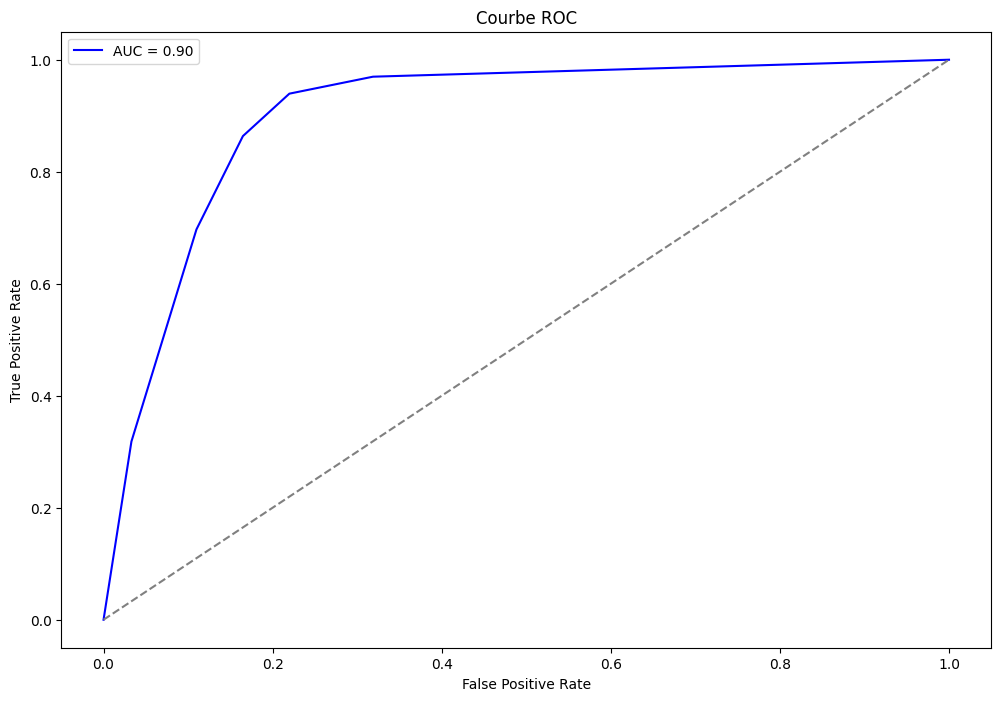

In [94]:
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


# **Modèle de Arbre de desicion :**


## L'Entraînement de modèle 


In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Visualisation de l'Arbre de Décision


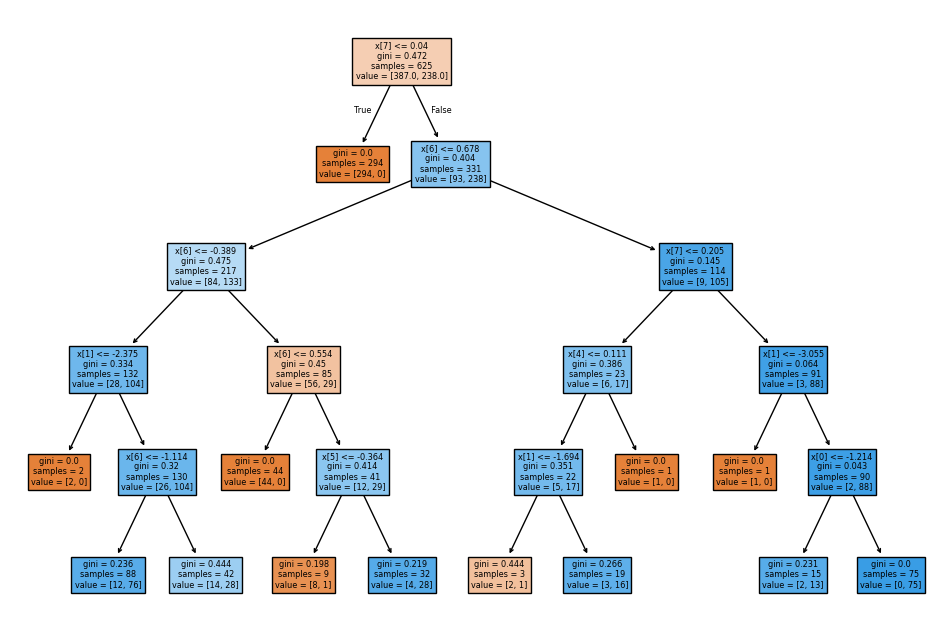

In [96]:
plt.figure(figsize=(12, 8))
plot_tree(dt,  filled=True)
plt.show()

### Prédictions sur les données de test


In [97]:
y_pred_dt = dt.predict(X_test)


## **Évaluation du modèle** :


### l'accuracy


In [98]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Précision du modèle d'Arbre de Décision: {accuracy_dt:.2f}")

Précision du modèle d'Arbre de Décision: 0.95


### Rapport de classification


In [99]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred_dt))


Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        91
           1       0.89      1.00      0.94        66

    accuracy                           0.95       157
   macro avg       0.95      0.96      0.95       157
weighted avg       0.95      0.95      0.95       157



### Matrice de Confusion


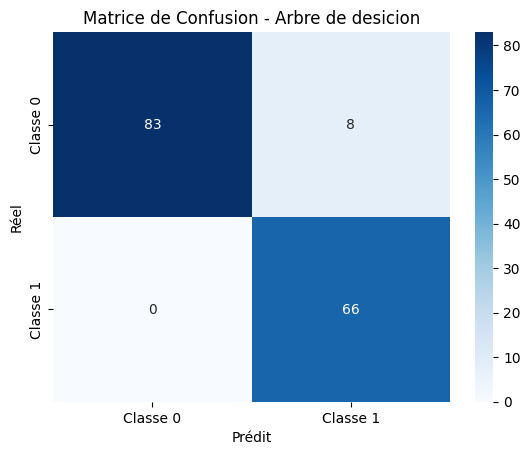

In [100]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Arbre de desicion')
plt.show()

### la courbe ROC


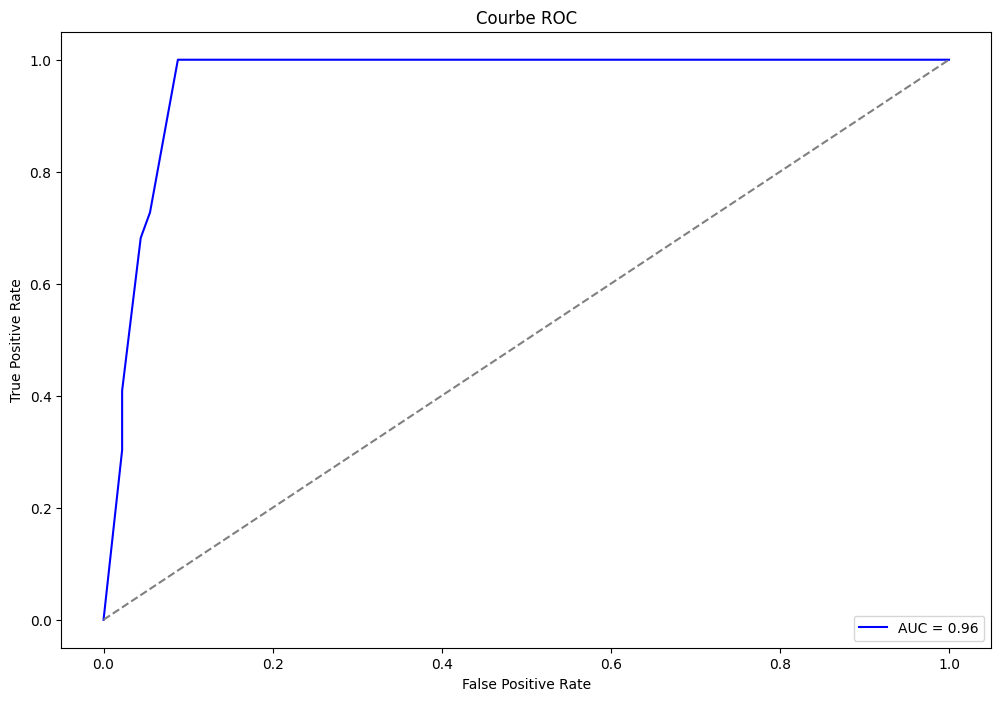

In [101]:
y_scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


# **Modèle de Random Forest :**


## L'Entraînement de modèle 


In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

## Prédictions sur les données de test


In [103]:
y_pred_rf = rf.predict(X_test)


## **Évaluation du modèle** :


### l'accuracy


In [104]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle Random Forest: {accuracy:.2f}")

Précision du modèle Random Forest: 0.92


### Rapport de classification


In [105]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        91
           1       0.84      0.98      0.91        66

    accuracy                           0.92       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157



### Matrice de confusion


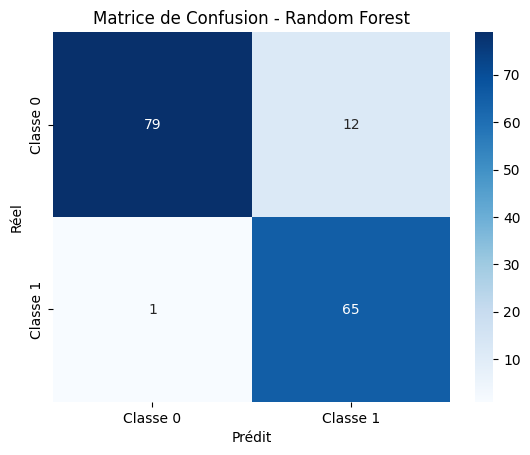

In [106]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Random Forest')
plt.show()

### la courbe ROC


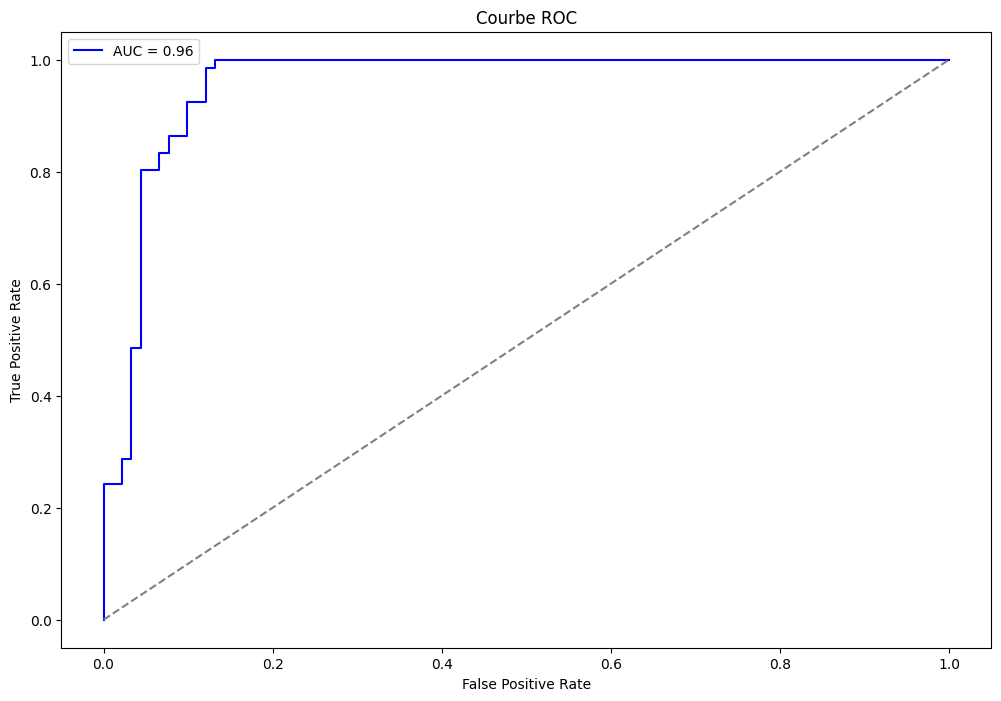

In [107]:
y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


# **Modèle de SVC :**


## L'Entraînement de modèle 


In [108]:
from sklearn.svm import SVC

svm_cla=SVC(kernel='rbf', C=1.0)
svm_cla.fit(X_train,y_train)

SVC()

## Prédiction sur les données de test


In [109]:
y_pred_svc=svm_cla.predict(X_test)


## **Évaluation du modèle** :


### Accuracy 

In [110]:
accuracy_score(y_test,y_pred_svc)


0.8598726114649682

### Rapport de classification


In [111]:
print("\n",classification_report(y_test,y_pred_svc))



               precision    recall  f1-score   support

           0       0.94      0.81      0.87        91
           1       0.78      0.92      0.85        66

    accuracy                           0.86       157
   macro avg       0.86      0.87      0.86       157
weighted avg       0.87      0.86      0.86       157



### Matrice de confusion


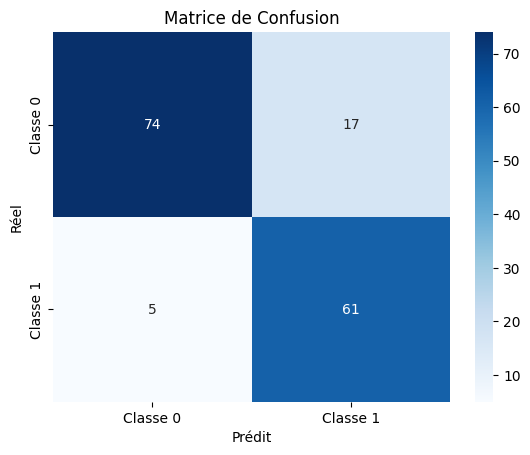

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### `Resumer :`

In [113]:
model_accuracies = {
     "Logistic Regression": accuracy_score(y_test, y_pred_log),
     "KNN": accuracy_score(y_test, y_pred_knn),
     "Decision Tree": accuracy_score(y_test, y_pred_dt),
     "Random Forest": accuracy_score(y_test, y_pred_rf),
     "SVM": accuracy_score(y_test, y_pred_svc)
}

for model_name, acc in model_accuracies.items():
     print(f"Accuracy de {model_name} : {acc:.2f}")

Accuracy de Logistic Regression : 0.82
Accuracy de KNN : 0.85
Accuracy de Decision Tree : 0.95
Accuracy de Random Forest : 0.92
Accuracy de SVM : 0.86


# **Enregistrement** 


In [ ]:
# import pickle

# with open("DT_95.pkl", "wb") as file:
#      pickle.dump(model, file)